In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization, Lambda, Input, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, Reshape, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, LearningRateScheduler, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilnet 
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Cargo los datos y normailzo las imágenes

In [ ]:
X_train = np.load('/content/drive/MyDrive/Redes TPS/TP3/Data/X_train.npy')/255
Y_train = np.load('/content/drive/MyDrive/Redes TPS/TP3/Data/y_train.npy')
X_test = np.load('/content/drive/MyDrive/Redes TPS/TP3/Data/X_test.npy')/255

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


Transformamos la clasificación (100 clases) en un vector binario con One Hot Encoding

In [ ]:
Y_train = to_categorical(Y_train)

Son imágenes RGB de 32x32 píxeles, es decir, de muy poca resolución. 


## Graficamos algunas imágenes

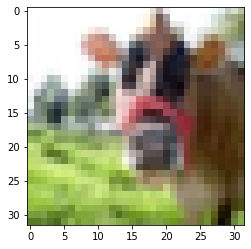

In [ ]:
plt.imshow(X_train[0])

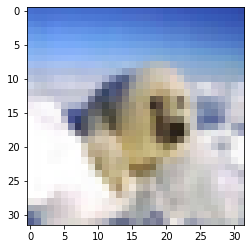

In [ ]:
plt.imshow(X_train[62])

In [ ]:
print(Y_train[1])

[29]


In [ ]:
print(Y_train[62])

[72]


##Generamos la red Convolucional 3D

### En primer lugar, probamos con la ResNest

In [ ]:
pip install resnet

  Created wheel for resnet: filename=resnet-0.1-py3-none-any.whl size=10041 sha256=6d36f949571ec2f22cfd58281c77d5bb1b98d2f3f2d786f93ee399066b66bc52
  Stored in directory: /root/.cache/pip/wheels/38/23/58/6e83e34ced7d4772b88e2e86305f94a1ca497bd87937f5e7ec
Successfully built resnet


In [ ]:
from keras.applications.resnet import ResNet50

In [ ]:
model = ResNet50(weights=None, input_shape=(32,32,3), classes=100 )

In [ ]:
for layer in model.layers:
  layer.trainable = False #congelo los pesos de la resnet, no se entrene. Para agregarle las capas al final

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

####seteamos algunos hiperparámetros

In [ ]:
epochs = 15
batch = 256
lr = 0.001
loss = 'categorical_crossentropy'
optimizer = 'adam'
metrics = ['Accuracy']


In [ ]:
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/15
157/157 [==============================] - 15s 98ms/step - loss: 4.6057 - Accuracy: 0.0098 - val_loss: 4.6057 - val_Accuracy: 0.0094
Epoch 2/15
157/157 [==============================] - 13s 84ms/step - loss: 4.6057 - Accuracy: 0.0098 - val_loss: 4.6057 - val_Accuracy: 0.0094
Epoch 3/15
157/157 [==============================] - 13s 84ms/step - loss: 4.6057 - Accuracy: 0.0098 - val_loss: 4.6057 - val_Accuracy: 0.0094
Epoch 4/15
157/157 [==============================] - 13s 84ms/step - loss: 4.6057 - Accuracy: 0.0098 - val_loss: 4.6057 - val_Accuracy: 0.0094
Epoch 5/15
157/157 [==============================] - 13s 83ms/step - loss: 4.6057 - Accuracy: 0.0098 - val_loss: 4.6057 - val_Accuracy: 0.0094
Epoch 6/15
157/157 [==============================] - 13s 83ms/step - loss: 4.6057 - Accuracy: 0.0098 - val_loss: 4.6057 - val_Accuracy: 0.0094
Epoch 7/15
157/157 [==============================] - 13s 83ms/step - loss: 4.6057 - Accuracy: 0.0098 - val_loss: 4.6057 - val_Accuracy:

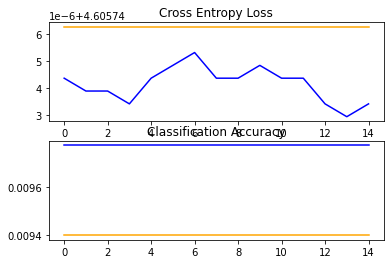

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['Accuracy'], color='blue', label='train')
plt.plot(history.history['val_Accuracy'], color='orange', label='test')

#Transfer learning con MLP  - realizado en clase

In [ ]:
model = ResNet50(include_top=False,weights="imagenet", input_shape=(32,32,3), classes=100 )

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers:
  layer.trainable = False #congelo los pesos de la resnet, no se entrene. Para agregarle las capas al final

In [ ]:
input_layer = model.layers[0].input

In [ ]:
output_resnet = model.layers[-1].output

In [ ]:
x = GlobalAveragePooling2D()(output_resnet)
x = Dense(100, activation="softmax")(x)

In [ ]:
model_2 = Model(inputs=input_layer,outputs=x)

In [ ]:
epochs = 50
batch = 256
lr = 0.01
loss = 'categorical_crossentropy'
optimizer = Adam(learning_rate=lr)
metrics = ['Accuracy']


In [ ]:
model_2.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
model_2.fit(X_train, Y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/50
157/157 [==============================] - 18s 92ms/step - loss: 5.3466 - Accuracy: 0.0326 - val_loss: 4.8208 - val_Accuracy: 0.0463
Epoch 2/50
157/157 [==============================] - 13s 84ms/step - loss: 4.6350 - Accuracy: 0.0580 - val_loss: 4.7032 - val_Accuracy: 0.0696
Epoch 3/50
157/157 [==============================] - 13s 84ms/step - loss: 4.5426 - Accuracy: 0.0699 - val_loss: 4.6428 - val_Accuracy: 0.0618
Epoch 4/50
157/157 [==============================] - 13s 83ms/step - loss: 4.4580 - Accuracy: 0.0801 - val_loss: 4.5030 - val_Accuracy: 0.0758
Epoch 5/50
157/157 [==============================] - 13s 84ms/step - loss: 4.4870 - Accuracy: 0.0842 - val_loss: 4.6820 - val_Accuracy: 0.0704
Epoch 6/50
157/157 [==============================] - 13s 84ms/step - loss: 4.4193 - Accuracy: 0.0896 - val_loss: 4.4958 - val_Accuracy: 0.0844
Epoch 7/50
157/157 [==============================] - 13s 84ms/step - loss: 4.3324 - Accuracy: 0.0997 - val_loss: 4.5470 - val_Accuracy:

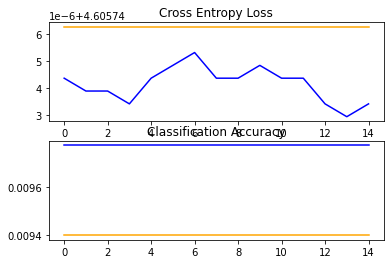

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['Accuracy'], color='blue', label='train')
plt.plot(history.history['val_Accuracy'], color='orange', label='test')

#Probamos con nuestra propia red Convolucional más sencilla

##Prueba 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras import backend as K
from matplotlib import pyplot

In [ ]:
#Definir Modelo
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(100, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                      

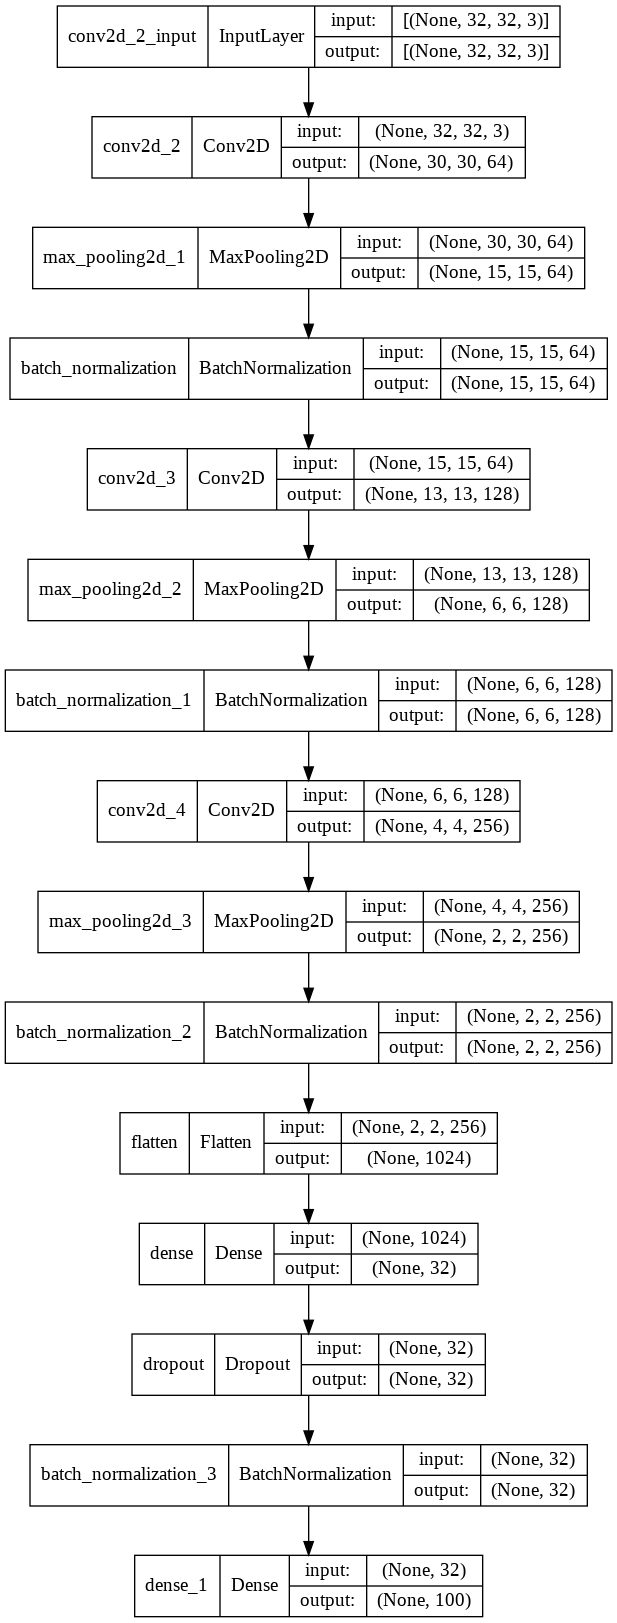

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 60
batch = 256
lr = 0.0001
loss = 'sparse_categorical_crossentropy'
optimizer = Adam(learning_rate=lr)
metrics = ['Accuracy']

In [ ]:
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.2)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Me overfitteo sacándole el drop out

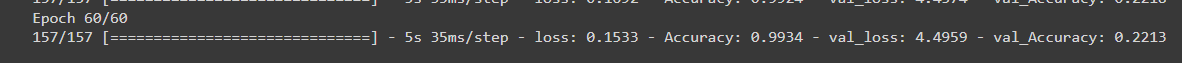

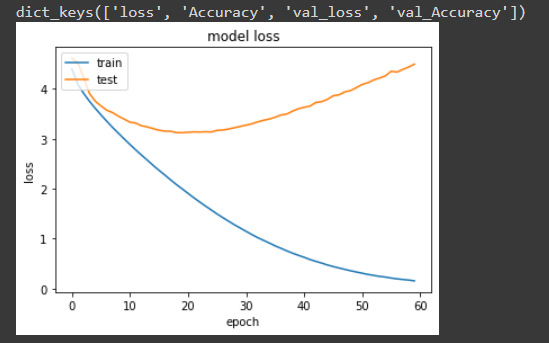

#VGG

A good starting point is the general architectural principles of the VGG models. These are a good starting point because they achieved top performance in the ILSVRC 2014 competition and because the modular structure of the architecture is easy to understand and implement.

###Con un bloque = 0.32

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_3.add(Dense(100, activation='softmax'))

In [ ]:
epochs = 40
batch = 64
lr = 0.001
loss = 'categorical_crossentropy'
opt = SGD(lr=lr, momentum=0.9)
metrics = ['Accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_3.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
model_3.fit(X_train, Y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/100
625/625 [==============================] - 10s 14ms/step - loss: 4.3531 - Accuracy: 0.0502 - val_loss: 4.0765 - val_Accuracy: 0.0917
Epoch 2/100
625/625 [==============================] - 8s 13ms/step - loss: 3.8707 - Accuracy: 0.1242 - val_loss: 3.7579 - val_Accuracy: 0.1436
Epoch 3/100
625/625 [==============================] - 8s 13ms/step - loss: 3.5981 - Accuracy: 0.1718 - val_loss: 3.5786 - val_Accuracy: 0.1797
Epoch 4/100
625/625 [==============================] - 8s 13ms/step - loss: 3.4002 - Accuracy: 0.2089 - val_loss: 3.4521 - val_Accuracy: 0.1985
Epoch 5/100
625/625 [==============================] - 8s 13ms/step - loss: 3.2430 - Accuracy: 0.2366 - val_loss: 3.3474 - val_Accuracy: 0.2142
Epoch 6/100
625/625 [==============================] - 8s 12ms/step - loss: 3.1077 - Accuracy: 0.2612 - val_loss: 3.2602 - val_Accuracy: 0.2284
Epoch 7/100
625/625 [==============================] - 8s 12ms/step - loss: 2.9914 - Accuracy: 0.2835 - val_loss: 3.1838 - val_Accuracy

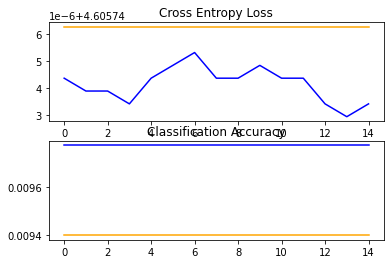

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['Accuracy'], color='blue', label='train')
plt.plot(history.history['val_Accuracy'], color='orange', label='test')

### Con 3 bloques = 0.35

In [ ]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_4.add(Dense(100, activation='softmax'))

In [ ]:
epochs = 100
batch = 64
lr = 0.001
loss = 'categorical_crossentropy'
opt = SGD(lr=lr, momentum=0.9)
metrics = ['Accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_4.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model_4.fit(X_train, Y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/100
625/625 [==============================] - 14s 22ms/step - loss: 4.1021 - Accuracy: 0.0857 - val_loss: 3.6914 - val_Accuracy: 0.1514
Epoch 2/100
625/625 [==============================] - 13s 21ms/step - loss: 3.4775 - Accuracy: 0.1848 - val_loss: 3.3907 - val_Accuracy: 0.2002
Epoch 3/100
625/625 [==============================] - 13s 21ms/step - loss: 3.1792 - Accuracy: 0.2363 - val_loss: 3.1827 - val_Accuracy: 0.2389
Epoch 4/100
625/625 [==============================] - 13s 21ms/step - loss: 2.9742 - Accuracy: 0.2784 - val_loss: 3.0671 - val_Accuracy: 0.2623
Epoch 5/100
625/625 [==============================] - 13s 21ms/step - loss: 2.8140 - Accuracy: 0.3077 - val_loss: 2.9794 - val_Accuracy: 0.2817
Epoch 6/100
625/625 [==============================] - 13s 21ms/step - loss: 2.6802 - Accuracy: 0.3374 - val_loss: 2.8821 - val_Accuracy: 0.2986
Epoch 7/100
625/625 [==============================] - 13s 21ms/step - loss: 2.5542 - Accuracy: 0.3623 - val_loss: 2.8507 - val_Ac

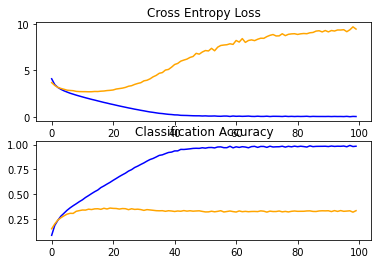

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['Accuracy'], color='blue', label='train')
plt.plot(history.history['val_Accuracy'], color='orange', label='test')

#Con dropout=0.4529

In [ ]:
model_5 = Sequential()
model_5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(MaxPooling2D((2, 2)))
model_5.add(Dropout(0.2))
model_5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(MaxPooling2D((2, 2)))
model_5.add(Dropout(0.2))
model_5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_5.add(MaxPooling2D((2, 2)))
model_5.add(Dropout(0.2))
model_5.add(Flatten())
model_5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_5.add(Dropout(0.2))
model_5.add(Dense(100, activation='softmax'))

In [ ]:
epochs = 80
batch = 64
lr = 0.001
loss = 'categorical_crossentropy'
opt = SGD(lr=lr, momentum=0.9)
metrics = ['Accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_5.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model_5.fit(X_train, Y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/80
625/625 [==============================] - 16s 24ms/step - loss: 4.4777 - Accuracy: 0.0240 - val_loss: 4.2401 - val_Accuracy: 0.0603
Epoch 2/80
625/625 [==============================] - 14s 23ms/step - loss: 4.1255 - Accuracy: 0.0698 - val_loss: 3.9425 - val_Accuracy: 0.1103
Epoch 3/80
625/625 [==============================] - 14s 23ms/step - loss: 3.8749 - Accuracy: 0.1071 - val_loss: 3.7181 - val_Accuracy: 0.1526
Epoch 4/80
625/625 [==============================] - 15s 24ms/step - loss: 3.7070 - Accuracy: 0.1352 - val_loss: 3.5243 - val_Accuracy: 0.1738
Epoch 5/80
625/625 [==============================] - 14s 23ms/step - loss: 3.5775 - Accuracy: 0.1529 - val_loss: 3.4141 - val_Accuracy: 0.2004
Epoch 6/80
625/625 [==============================] - 15s 23ms/step - loss: 3.4570 - Accuracy: 0.1767 - val_loss: 3.3251 - val_Accuracy: 0.2124
Epoch 7/80
625/625 [==============================] - 14s 23ms/step - loss: 3.3587 - Accuracy: 0.1929 - val_loss: 3.2082 - val_Accuracy:

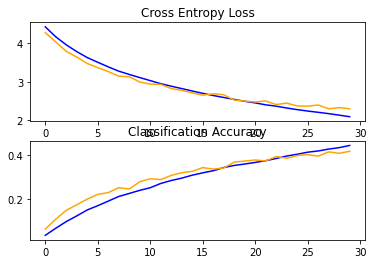

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['Accuracy'], color='blue', label='train')
plt.plot(history.history['val_Accuracy'], color='orange', label='test')

# Con Regularizador l2

In [ ]:
model_6 = Sequential()
model_6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_6.add(MaxPooling2D((2, 2)))
model_6.add(Dropout(0.2))
model_6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_6.add(MaxPooling2D((2, 2)))
model_6.add(Dropout(0.2))
model_6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_6.add(MaxPooling2D((2, 2)))
model_6.add(Dropout(0.2))
model_6.add(Flatten())
model_6.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model_6.add(Dropout(0.2))
model_6.add(Dense(100, activation='softmax'))

In [ ]:
epochs = 100
batch = 64
lr = 0.001
loss = 'categorical_crossentropy'
opt = SGD(lr=lr, momentum=0.9)
metrics = ['Accuracy']

In [ ]:
model_6.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model_6.fit(X_train, Y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.2)

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['Accuracy'], color='blue', label='train')
plt.plot(history.history['val_Accuracy'], color='orange', label='test')

#Con dropout + Batch Normalization =  0.4579

In [ ]:
model_7 = Sequential()
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.2))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.2))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.2))
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.2))
model_7.add(Flatten())
model_7.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_7.add(Dropout(0.2))
model_7.add(Dense(100, activation='softmax'))

In [ ]:
epochs = 60 #si no 50
batch = 64
lr = 0.001
loss = 'categorical_crossentropy'
optimizer = SGD(lr=lr, momentum=0.9)
metrics = ['Accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_7.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Redes TPS/TP3/bestmodel.hdf5', monitor='val_Accuracy', verbose=1, save_best_only=True)
history = model_7.fit(X_train, Y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.2, callbacks=[checkpoint],)

Epoch 1/10
625/625 [==============================] - 22s 35ms/step - loss: 2.0593 - Accuracy: 0.4425 - val_loss: 2.1148 - val_Accuracy: 0.4393
Epoch 2/10
625/625 [==============================] - 18s 28ms/step - loss: 2.0468 - Accuracy: 0.4452 - val_loss: 2.1192 - val_Accuracy: 0.4373
Epoch 3/10
625/625 [==============================] - 17s 28ms/step - loss: 2.0221 - Accuracy: 0.4491 - val_loss: 2.1728 - val_Accuracy: 0.4227
Epoch 4/10
625/625 [==============================] - 17s 27ms/step - loss: 2.0046 - Accuracy: 0.4529 - val_loss: 2.1419 - val_Accuracy: 0.4298
Epoch 5/10
625/625 [==============================] - 17s 27ms/step - loss: 1.9797 - Accuracy: 0.4613 - val_loss: 2.1981 - val_Accuracy: 0.4243
Epoch 6/10
625/625 [==============================] - 17s 27ms/step - loss: 1.9577 - Accuracy: 0.4660 - val_loss: 2.1813 - val_Accuracy: 0.4328
Epoch 7/10
625/625 [==============================] - 17s 27ms/step - loss: 1.9436 - Accuracy: 0.4665 - val_loss: 2.0769 - val_Accuracy:

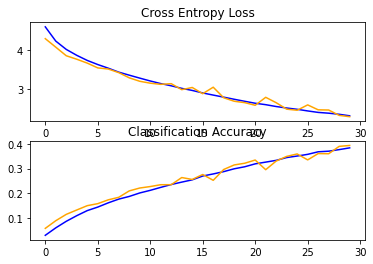

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['Accuracy'], color='blue', label='train')
plt.plot(history.history['val_Accuracy'], color='orange', label='test')

#Con dropout + Batch Normalization más capas

In [ ]:
model_8 = Sequential()
model_8.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_8.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_8.add(MaxPooling2D((2, 2)))
model_8.add(BatchNormalization())
model_8.add(Dropout(0.2))
model_8.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_8.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_8.add(MaxPooling2D((2, 2)))
model_8.add(BatchNormalization())
model_8.add(Dropout(0.2))
model_8.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_8.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_8.add(MaxPooling2D((2, 2)))
model_8.add(BatchNormalization())
model_8.add(Dropout(0.2))
model_8.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_8.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_8.add(MaxPooling2D((2, 2)))
model_8.add(BatchNormalization())
model_8.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_8.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_8.add(MaxPooling2D((2, 2)))
model_8.add(BatchNormalization())
model_8.add(Dropout(0.2))
model_8.add(Flatten())
model_8.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_8.add(Dropout(0.2))
model_8.add(Dense(100, activation='softmax'))

In [ ]:
epochs = 50 #si no 50
batch = 64
lr = 0.0001
loss = 'categorical_crossentropy'
optimizer = SGD(lr=lr, momentum=0.9)
metrics = ['Accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_8.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Redes TPS/TP3/bestmodel_8.hdf5', monitor='val_Accuracy',mode='max', verbose=1, save_best_only=True)
history = model_8.fit(X_train, Y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.2, callbacks=[checkpoint],)

Epoch 1/50
625/625 [==============================] - ETA: 0s - loss: 0.9856 - Accuracy: 0.6974
Epoch 00001: val_Accuracy improved from -inf to 0.44930, saving model to /content/drive/MyDrive/Redes TPS/TP3/bestmodel_8.hdf5
625/625 [==============================] - 20s 32ms/step - loss: 0.9856 - Accuracy: 0.6974 - val_loss: 2.5005 - val_Accuracy: 0.4493
Epoch 2/50
624/625 [============================>.] - ETA: 0s - loss: 0.9762 - Accuracy: 0.6999
Epoch 00002: val_Accuracy did not improve from 0.44930
625/625 [==============================] - 20s 32ms/step - loss: 0.9765 - Accuracy: 0.6999 - val_loss: 2.5177 - val_Accuracy: 0.4430
Epoch 3/50
625/625 [==============================] - ETA: 0s - loss: 0.9467 - Accuracy: 0.7084
Epoch 00003: val_Accuracy did not improve from 0.44930
625/625 [==============================] - 19s 31ms/step - loss: 0.9467 - Accuracy: 0.7084 - val_loss: 2.6431 - val_Accuracy: 0.4369
Epoch 4/50
625/625 [==============================] - ETA: 0s - loss: 0.9499

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

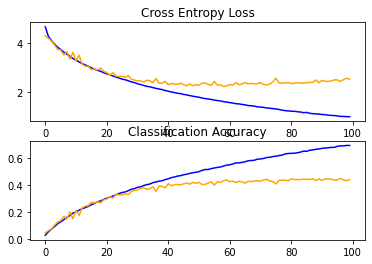

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['Accuracy'], color='blue', label='train')
plt.plot(history.history['val_Accuracy'], color='orange', label='test')

#Con dropout + Batch Normalization más capas - Variamos los valores de dropout

In [ ]:
model_7 = Sequential()
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.5))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.25))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.1))
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.2))
model_7.add(Flatten())
model_7.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_7.add(Dropout(0.2))
model_7.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_7.add(Dropout(0.2))
model_7.add(Dense(100, activation='softmax'))

In [ ]:
epochs = 30 #si no 50
batch = 64
lr = 0.001
loss = 'categorical_crossentropy'
optimizer = Adam(lr=lr)
metrics = ['Accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_7.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Redes TPS/TP3/bestmodel_MLP_3.hdf5', monitor='val_Accuracy', mode = 'max', verbose=1, save_best_only=True)
history = model_7.fit(X_train, Y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.2, callbacks=[checkpoint],)

Epoch 1/30
625/625 [==============================] - ETA: 0s - loss: 0.6927 - Accuracy: 0.7922
Epoch 00001: val_Accuracy improved from -inf to 0.44660, saving model to /content/drive/MyDrive/Redes TPS/TP3/bestmodel_MLP_3.hdf5
625/625 [==============================] - 20s 31ms/step - loss: 0.6927 - Accuracy: 0.7922 - val_loss: 3.0298 - val_Accuracy: 0.4466
Epoch 2/30
625/625 [==============================] - ETA: 0s - loss: 0.6926 - Accuracy: 0.7938
Epoch 00002: val_Accuracy improved from 0.44660 to 0.46140, saving model to /content/drive/MyDrive/Redes TPS/TP3/bestmodel_MLP_3.hdf5
625/625 [==============================] - 19s 31ms/step - loss: 0.6926 - Accuracy: 0.7938 - val_loss: 2.9089 - val_Accuracy: 0.4614
Epoch 3/30
625/625 [==============================] - ETA: 0s - loss: 0.6712 - Accuracy: 0.7962
Epoch 00003: val_Accuracy did not improve from 0.46140
625/625 [==============================] - 19s 30ms/step - loss: 0.6712 - Accuracy: 0.7962 - val_loss: 2.8704 - val_Accuracy: 

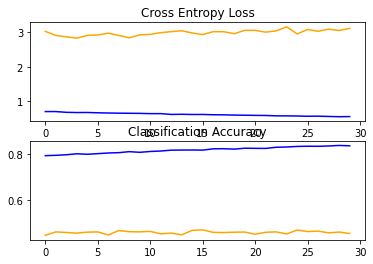

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['Accuracy'], color='blue', label='train')
plt.plot(history.history['val_Accuracy'], color='orange', label='test')

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model_7.load_weights('/content/drive/MyDrive/Redes TPS/TP3/bestmodel_MLP_2.hdf5')

#Con dropout + Batch Normalization más capas - Variamos la MLP

In [ ]:
model_7 = Sequential()
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.2))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.2))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.2))
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_7.add(MaxPooling2D((2, 2)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.2))
model_7.add(Flatten())
model_7.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_7.add(Dropout(0.2))
model_7.add(Dense(100, activation='softmax'))

In [ ]:
epochs = 60 #si no 50
batch = 64
lr = 0.001
loss = 'categorical_crossentropy'
optimizer = SGD(lr=lr, momentum=0.9)
metrics = ['Accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model_7.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Redes TPS/TP3/bestmodel.hdf5', monitor='val_Accuracy', verbose=1, save_best_only=True)
history = model_7.fit(X_train, Y_train, batch_size=batch, epochs=epochs, verbose=1, validation_split=0.2, callbacks=[checkpoint],)

Epoch 1/10
625/625 [==============================] - 22s 35ms/step - loss: 2.0593 - Accuracy: 0.4425 - val_loss: 2.1148 - val_Accuracy: 0.4393
Epoch 2/10
625/625 [==============================] - 18s 28ms/step - loss: 2.0468 - Accuracy: 0.4452 - val_loss: 2.1192 - val_Accuracy: 0.4373
Epoch 3/10
625/625 [==============================] - 17s 28ms/step - loss: 2.0221 - Accuracy: 0.4491 - val_loss: 2.1728 - val_Accuracy: 0.4227
Epoch 4/10
625/625 [==============================] - 17s 27ms/step - loss: 2.0046 - Accuracy: 0.4529 - val_loss: 2.1419 - val_Accuracy: 0.4298
Epoch 5/10
625/625 [==============================] - 17s 27ms/step - loss: 1.9797 - Accuracy: 0.4613 - val_loss: 2.1981 - val_Accuracy: 0.4243
Epoch 6/10
625/625 [==============================] - 17s 27ms/step - loss: 1.9577 - Accuracy: 0.4660 - val_loss: 2.1813 - val_Accuracy: 0.4328
Epoch 7/10
625/625 [==============================] - 17s 27ms/step - loss: 1.9436 - Accuracy: 0.4665 - val_loss: 2.0769 - val_Accuracy:

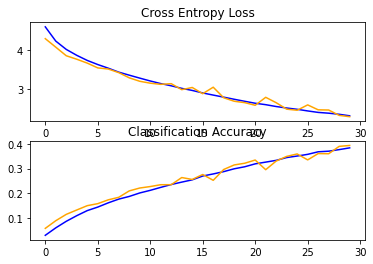

In [ ]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['Accuracy'], color='blue', label='train')
plt.plot(history.history['val_Accuracy'], color='orange', label='test')

#Generamos el submit

In [ ]:
model_7.evaluate(X_train,Y_train)

1563/1563 [==============================] - 16s 10ms/step - loss: 0.6972 - Accuracy: 0.8544


[0.6972024440765381, 0.854420006275177]

In [ ]:
y_pred = model_7.predict(X_test)

In [ ]:
y_final = y_pred.argmax(axis=1)

In [ ]:
df = pd.DataFrame(data=y_final, columns = ['label'])
df.index.name='Id'

In [ ]:
df

,label
Id,
0,55
1,96
2,55
3,15
4,71
...,...
9995,83
9996,63
9997,51


In [ ]:
df.to_csv('/content/drive/MyDrive/Redes TPS/TP3/submission_dropout_distintos_2.csv')